In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

In [ ]:
def load_and_preprocess(input_path: str, output_path: str):
    df = pd.read_csv(input_path)
    print(f"Загружено {df.shape[0]} строк, {df.shape[1]} признаков.")

    df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
    df["ExerciseAngina"] = df["ExerciseAngina"].map({"Y": 1, "N": 0})

    cat_cols = ["ChestPainType", "RestingECG", "ST_Slope"]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    df["HeartDisease"] = df["HeartDisease"].astype(int)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_csv(output_path, index=False)
    print(f"Обработано и сохранено: {output_path}")
    print(f"Признаков (без таргета): {df.shape[1] - 1}")
    return df

df = load_and_preprocess("data/raw/heart.csv", "data/processed/heart_processed.csv")

Загружено 918 строк, 12 признаков.
Обработано и сохранено: data/processed/heart_processed.csv
Признаков (без таргета): 15


In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    bool   
 10  ChestPainType_NAP  918 non-null    bool   
 11  ChestPainType_TA   918 non-null    bool   
 12  RestingECG_Normal  918 non-null    bool   
 13  RestingECG_ST      918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(7), float64(1), in

In [ ]:
df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


Убираем аномалии


In [ ]:
print("Количество записей с Cholesterol = 0:", (df['Cholesterol'] == 0).sum())

if (df['Cholesterol'] == 0).any():
    median_chol = df[df['Cholesterol'] > 0]['Cholesterol'].median()
    df['Cholesterol'] = df['Cholesterol'].replace(0, median_chol)
    print(f" Cholesterol=0 заменены на медиану: {median_chol}")

df.to_csv("data/processed/heart_processed.csv", index=False)

Количество записей с Cholesterol = 0: 172
 Cholesterol=0 заменены на медиану: 237.0


In [ ]:
if (df['RestingBP'] == 0).any():
    median_bp = df[df['RestingBP'] > 0]['RestingBP'].median()
    df['RestingBP'] = df['RestingBP'].replace(0, median_bp)
    print(f" RestingBP=0 → медиана: {median_bp}")

df.to_csv("data/processed/heart_processed.csv", index=False)

In [ ]:
print(df[['RestingBP', 'Cholesterol']].describe().loc[['min', 'max']])

     RestingBP  Cholesterol
min       80.0         85.0
max      200.0        603.0


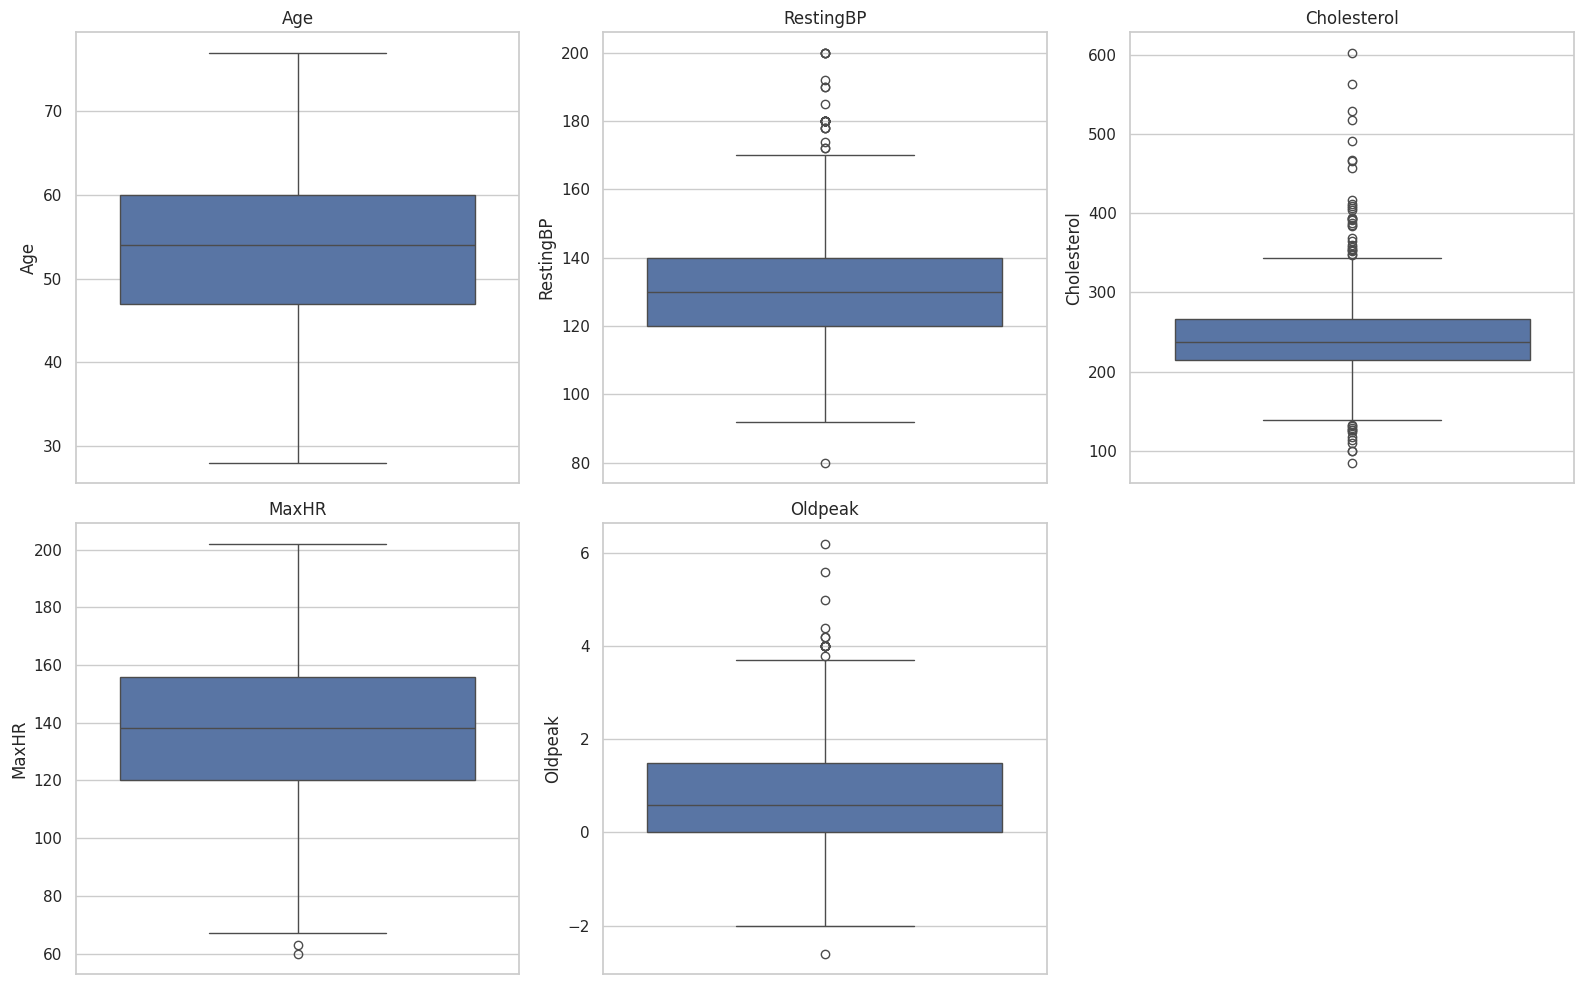

In [ ]:
import seaborn as sns #boxplot’ы
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
numerical = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

В этом датасете НЕТ ни одного признака, где выбросы нужно удалять.
Все "выбросы" — это реальные, клинически значимые данные, которые помогают модели распознавать тяжёлых пациентов.
Единственное, что требовалось — исправить артефакты (Cholesterol=0, RestingBP=0) — и мы это сделали.

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

print("Выбросы по IQR:")
for col in ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    print(f"  {col}: {count_outliers(df[col])} шт.")

Выбросы по IQR:
  RestingBP: 27 шт.
  Cholesterol: 41 шт.
  MaxHR: 2 шт.
  Oldpeak: 16 шт.


In [ ]:
chol_outliers = df[df['Cholesterol'] > df['Cholesterol'].quantile(0.75) + 1.5 * (df['Cholesterol'].quantile(0.75) - df['Cholesterol'].quantile(0.25))]
print("Доля больных среди выбросов Cholesterol:", chol_outliers['HeartDisease'].mean())

Доля больных среди выбросов Cholesterol: 0.5517241379310345


In [ ]:
print("Общая доля больных в датасете:", df['HeartDisease'].mean())

Общая доля больных в датасете: 0.5533769063180828


Не удалять и не обрезать выбросы в Cholesterol. Значение в выбросах очень близко к среднему по датасету.



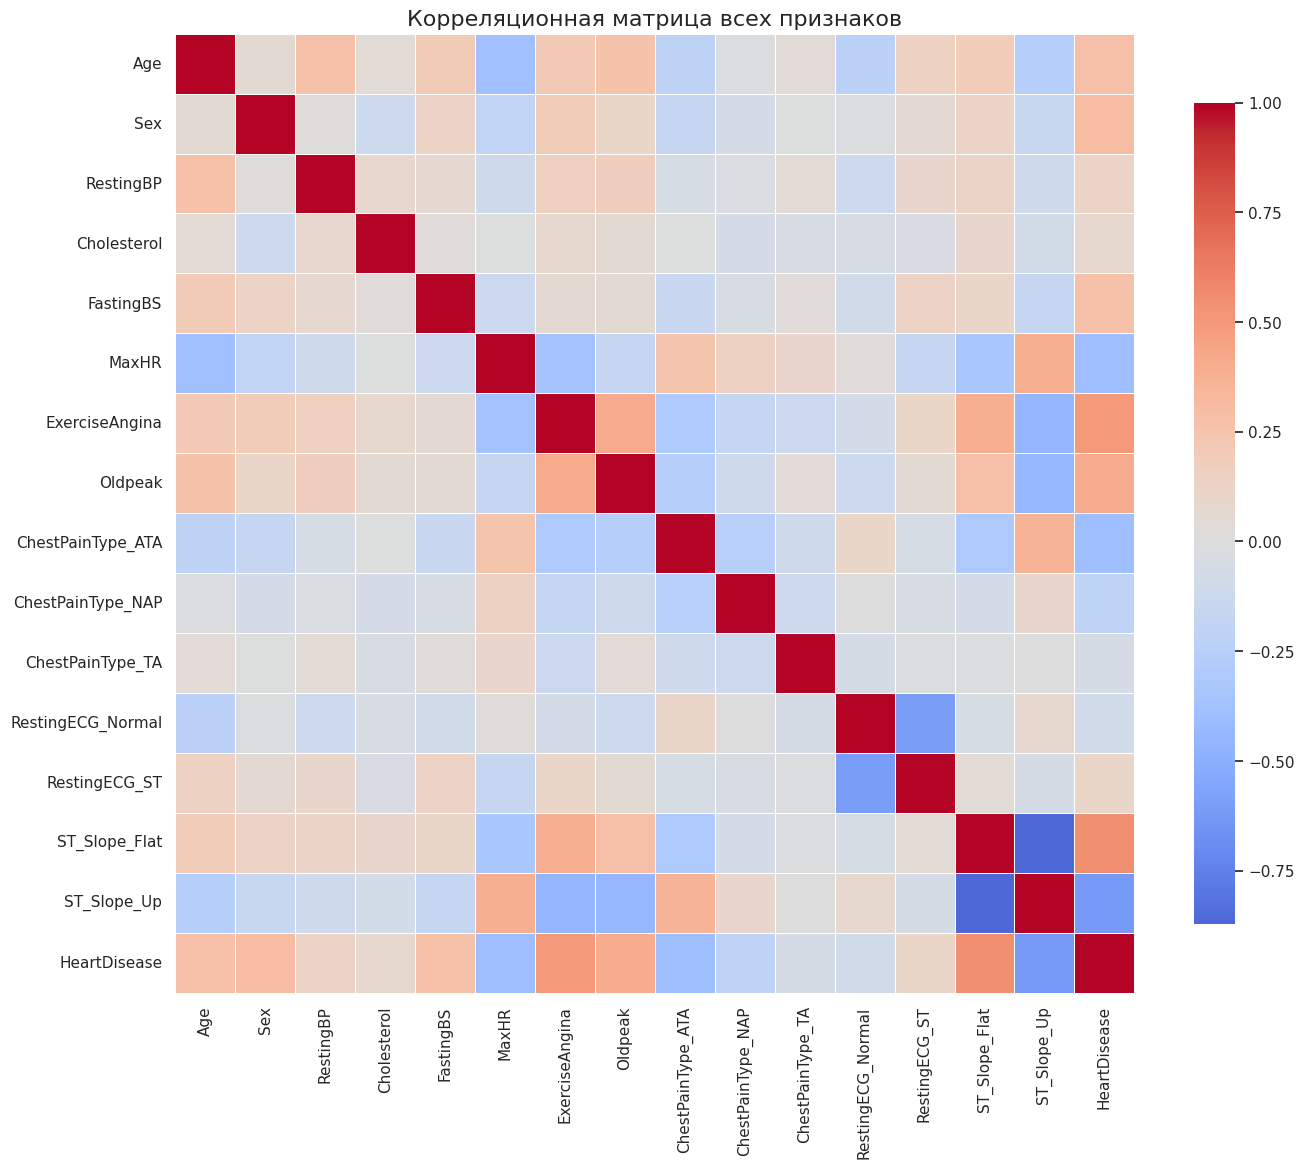

ТОП-10 признаков по корреляции с HeartDisease:
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ExerciseAngina       0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Sex                  0.305445
Age                  0.282039
FastingBS            0.267291
ChestPainType_NAP    0.212964
Name: HeartDisease, dtype: float64
Сильные признаки (|r| > 0.3): 7 шт.
Слабые признаки (|r| < 0.1): 3 шт.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/processed/heart_processed.csv")

feature_cols = [col for col in df.columns if col != 'HeartDisease']
data_for_corr = df[feature_cols + ['HeartDisease']]

plt.figure(figsize=(14, 12))
corr_matrix = data_for_corr.corr()

sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title('Корреляционная матрица всех признаков', fontsize=16)
plt.tight_layout()
plt.show()

corr_with_target = corr_matrix['HeartDisease'].drop('HeartDisease')
top_features = corr_with_target.abs().sort_values(ascending=False)

print("ТОП-10 признаков по корреляции с HeartDisease:")
print(top_features.head(10))


strong_features = top_features[top_features > 0.3].index.tolist()
weak_features = top_features[top_features < 0.1].index.tolist()

print(f"Сильные признаки (|r| > 0.3): {len(strong_features)} шт.")
print(f"Слабые признаки (|r| < 0.1): {len(weak_features)} шт.")



In [ ]:
import os
import json
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


def main():
    df = pd.read_csv("data/processed/heart_processed.csv")
    X = df.drop("HeartDisease", axis=1)
    y = df["HeartDisease"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    os.makedirs("data/processed", exist_ok=True)
    pd.concat([X_test, y_test], axis=1).to_csv("data/processed/test_set.csv", index=False)

    os.makedirs("models", exist_ok=True)
    os.makedirs("reports", exist_ok=True)

    scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    print("Обучение logistic_regression...")
    scaler = StandardScaler()
    X_train_lr = scaler.fit_transform(X_train)
    lr = LogisticRegression(random_state=42, max_iter=2000)
    lr.fit(X_train_lr, y_train)

    cv_lr = cross_validate(lr, X_train_lr, y_train, cv=5, scoring=scoring, n_jobs=-1)
    lr_metrics = {metric: float(cv_lr[f"test_{metric}"].mean()) for metric in scoring}
    with open("reports/logistic_regression_metrics.json", "w") as f:
        json.dump(lr_metrics, f, indent=4)

    joblib.dump(lr, "models/logistic_regression.pkl")
    joblib.dump(scaler, "models/scaler.pkl")

    print("Обучение random_forest...")
    rf = RandomForestClassifier(random_state=42, n_estimators=100)
    rf.fit(X_train, y_train)

    cv_rf = cross_validate(rf, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    rf_metrics = {metric: float(cv_rf[f"test_{metric}"].mean()) for metric in scoring}
    with open("reports/random_forest_metrics.json", "w") as f:
        json.dump(rf_metrics, f, indent=4)

    joblib.dump(rf, "models/random_forest.pkl")

    print("Обучение xgboost...")
    xgb = XGBClassifier(random_state=42, eval_metric="logloss", use_label_encoder=False)
    xgb.fit(X_train, y_train)

    cv_xgb = cross_validate(xgb, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
    xgb_metrics = {metric: float(cv_xgb[f"test_{metric}"].mean()) for metric in scoring}
    with open("reports/xgboost_metrics.json", "w") as f:
        json.dump(xgb_metrics, f, indent=4)

    joblib.dump(xgb, "models/xgboost.pkl")

    print("Все модели обучены, кросс-валидационные метрики сохранены как *_metrics.json")


if __name__ == "__main__":
    main()

Обучение logistic_regression...
Обучение random_forest...
Обучение xgboost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:50:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Все модели обучены, кросс-валидационные метрики сохранены как *_metrics.json


Метрики моделей:


,accuracy,precision,recall,f1,roc_auc
logistic_regression,0.848709,0.854652,0.876724,0.865212,0.921123
random_forest,0.858252,0.858653,0.891448,0.874110,0.924707
xgboost,0.848737,0.865165,0.864438,0.863510,0.920051


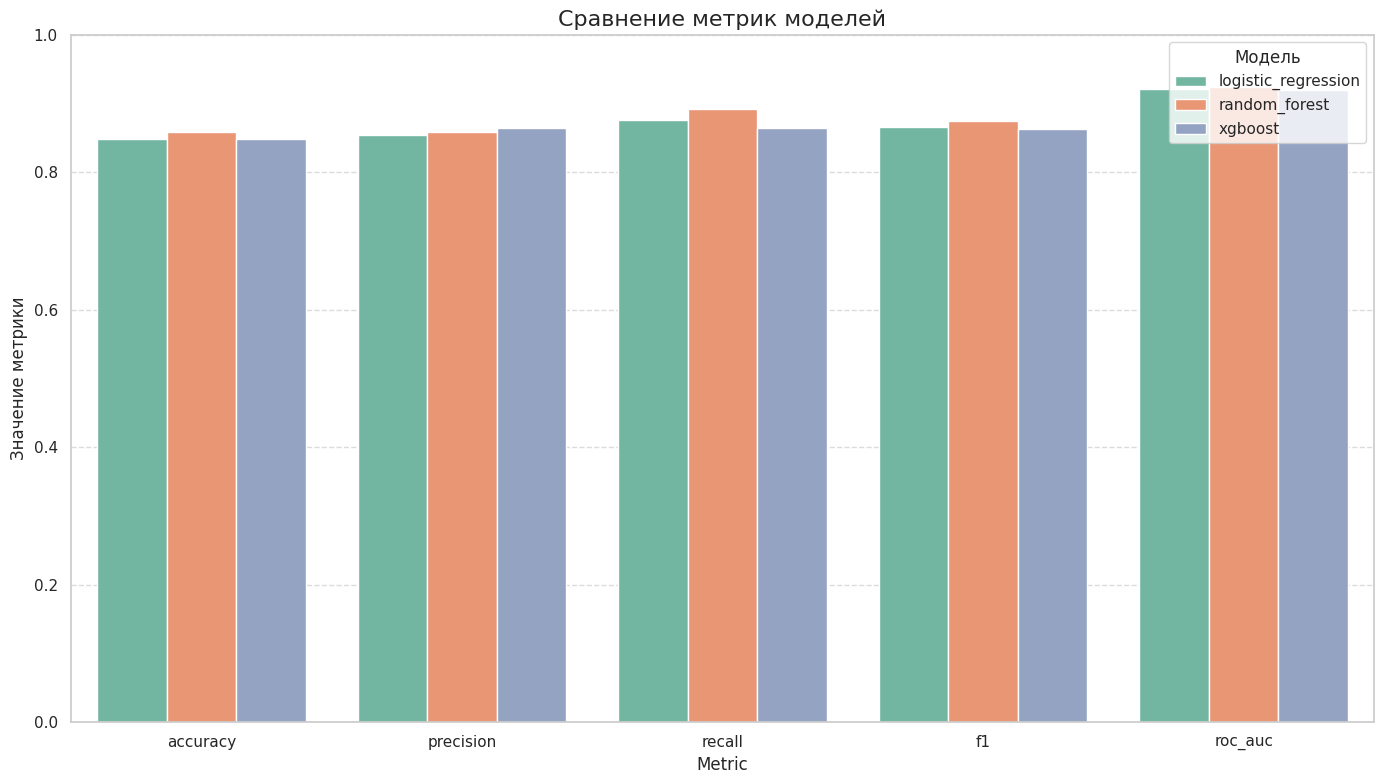

In [ ]:
models = ["logistic_regression", "random_forest", "xgboost"]

metrics_data = {}
for model in models:
    path = f"reports/{model}_metrics.json"
    if os.path.exists(path):
        with open(path, "r") as f:
            metrics_data[model] = json.load(f)
    else:
        print(f"⚠️ Файл {path} не найден!")

df_metrics = pd.DataFrame(metrics_data).T
print("Метрики моделей:")
display(df_metrics)

# Визуализация
plt.figure(figsize=(14, 8))

df_plot = df_metrics.reset_index().melt(
    id_vars='index',
    var_name='Metric',
    value_name='Score'
)
df_plot.rename(columns={'index': 'Model'}, inplace=True)

palette = sns.color_palette("Set2", len(models))

sns.barplot(
    data=df_plot,
    x='Metric',
    y='Score',
    hue='Model',
    palette=palette
)

plt.title('Сравнение метрик моделей', fontsize=16)
plt.ylabel('Значение метрики')
plt.ylim(0, 1)
plt.legend(title='Модель')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(joblib.load("models/random_forest.pkl"), "models/best_model.pkl")

['models/best_model.pkl']

In [ ]:
df_raw = pd.read_csv("data/raw/heart.csv")

df_processed = load_and_preprocess("data/raw/heart.csv", "data/processed/heart_processed.csv")

print("="*60)
print("ИСХОДНЫЙ ДАТАСЕТ ")
print("="*60)
print(df_raw.head(3))

print("\n" + "="*60)
print("ОБРАБОТАННЫЙ ДАТАСЕТ")
print("="*60)
print(df_processed.head(3))


Загружено 918 строк, 12 признаков.
Обработано и сохранено: data/processed/heart_processed.csv
Признаков (без таргета): 15
ИСХОДНЫЙ ДАТАСЕТ 
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  

ОБРАБОТАННЫЙ ДАТАСЕТ
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   

   Oldpeak  Hear

Выбрана логистическая регрессия из-за её наивысшего recall чувствительность(91.2%), что критически важно для минимизации ложноотрицательных диагнозов